**SALES PREDICTION.**

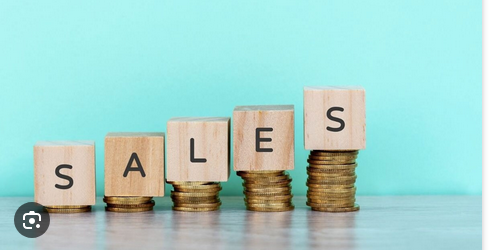

In [62]:
# Importing essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#loading Dataset
df=pd.read_csv('/content/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Data Preprocessing**

In [64]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [65]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [66]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [67]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [69]:
df.shape

(200, 4)

In [70]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [71]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [72]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


**Data Visualization.**

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

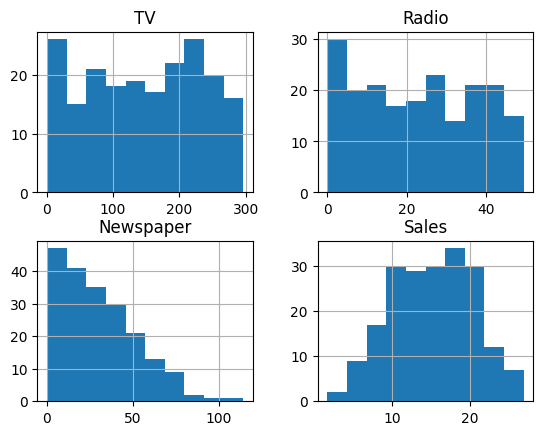

In [73]:
df.hist()

<Axes: >

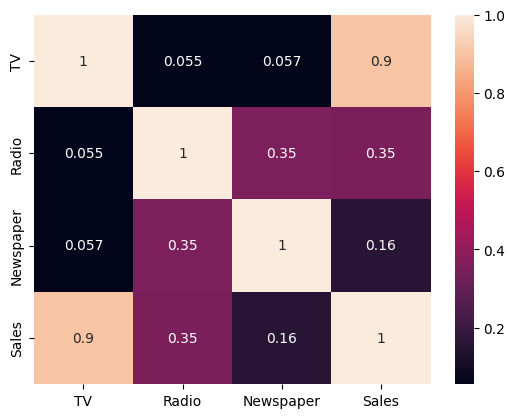

In [74]:
sns.heatmap(df.corr(),annot=True)

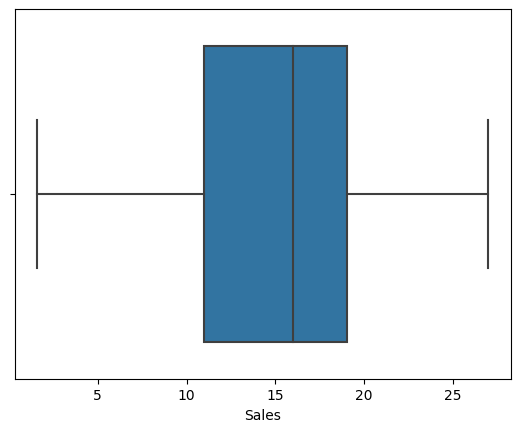

In [75]:
sns.boxplot(x=df['Sales'])
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

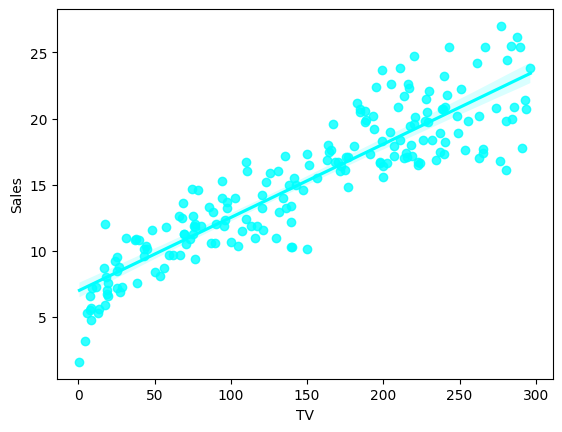

In [76]:
#Let's see how Sales are related with other variables using scatter plot.
# TV Vs Sales
sns.regplot(x=df['TV'],y=df['Sales'],color='cyan')

<Axes: xlabel='Radio', ylabel='Sales'>

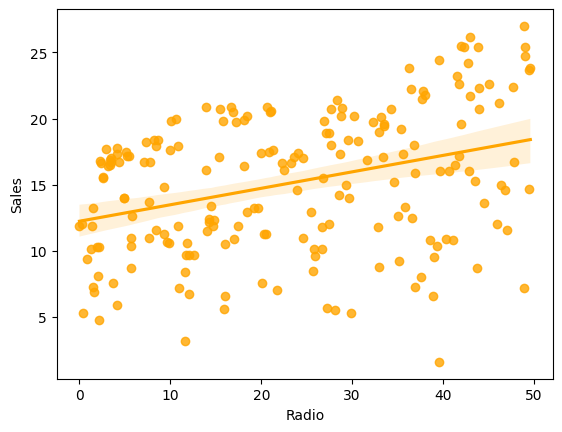

In [77]:
#Radio Vs Sales
sns.regplot(x=df['Radio'],y=df['Sales'],color='orange')

<Axes: xlabel='Newspaper', ylabel='Sales'>

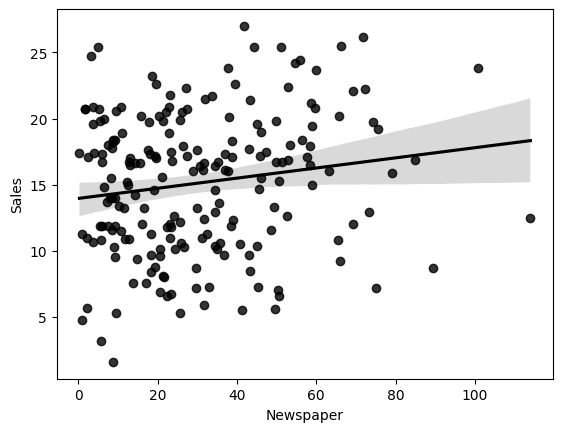

In [78]:
#Newspaper Vs sales
sns.regplot(x=df['Newspaper'],y=df['Sales'],color='black')

**Model Creation.**

In [79]:
# Seperating x & y
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [80]:
# Training & Testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [81]:
x_train

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [82]:
x_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [83]:
# Model Creation => Multiple Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [84]:
# Creating dataframe
values={'actual_value':y_test,'predicted_value':y_pred,'difference':y_test-y_pred}
df1=pd.DataFrame(values)
df1

,actual_value,predicted_value,difference
95,16.9,17.159919,-0.259919
15,22.4,20.533695,1.866305
30,21.4,23.689144,-2.289144
158,7.3,9.519146,-2.219146
128,24.7,21.607368,3.092632
115,12.6,12.781013,-0.181013
69,22.3,21.086363,1.213637
170,8.4,8.760542,-0.360542
174,16.5,17.115000,-0.615000
45,16.1,16.687896,-0.587896


In [85]:
# Slope
print("Slope is")
list(zip(x,model.coef_))

Slope is


[('TV', 0.05358869132706914),
 ('Radio', 0.10270676778771287),
 ('Newspaper', 0.007931667677316324)]

In [86]:
# Constant
print("constant is",model.intercept_)

constant is 4.743766701589685


**Performance Evaluation.**

In [87]:
# a] MAE
from sklearn.metrics import mean_absolute_error
print("MAE Is ",mean_absolute_error(y_test,y_pred))

MAE Is  1.1594875061090582


In [88]:
# b] MAPE
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE Is ",mean_absolute_percentage_error(y_test,y_pred))

MAPE Is  0.10536440823029307


In [89]:
# c] MSE
from sklearn.metrics import mean_squared_error
print("MSE Is ",mean_squared_error(y_test,y_pred))

MSE Is  2.541624036229147


In [90]:
# d] RMSE
data=mean_squared_error(y_test,y_pred)
print(np.sqrt(data))

1.5942471691143587


In [91]:
# e] R2_score
from sklearn.metrics import r2_score
print("r2 score Is ",r2_score(y_test,y_pred))

r2 score Is  0.9091484341849799
